# Homework 5
## Parker George
### February 21, 2025

# Problem 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize
from scipy import stats

In [3]:
# Problem 1(a)
quad(lambda x: (1+x**2)/x, 1, 20)

(202.495732273554, 1.3443696573563126e-08)

In [4]:
# Problem 1(b)
quad(lambda x: (np.sin(x)*np.exp(-x))/x, 1, np.inf)

(0.1793245350394128, 7.620675259521867e-09)

In [5]:
# Problem 1(c)
quad(lambda x: np.sin(x)/x, 0 , 1)

(0.946083070367183, 1.0503632079297087e-14)

In [6]:
# Problem 1(d)
# Doesn't work great for the sin functions and the recursions exceed the maximum but for simple functions it works well.
def riemann(f, a, b, tol=1e-6):

    def integrate_recursive(a, b, tol):

        mid = (a + b) / 2

        # Midpoint rule
        I_mid = (b - a) * f(mid)

        # Trapezoidal rule
        I_trap = (b - a) * (f(a) + f(b)) / 2

        # Error estimation
        error = abs(I_trap - I_mid)

        if error < tol:
            return I_mid  # Accept the midpoint approximation
        else:
            # Subdivide interval and integrate recursively
            left = integrate_recursive(a, mid, tol / 2)
            right = integrate_recursive(mid, b, tol / 2)
            return left + right

    return integrate_recursive(a, b, tol)

print(riemann(lambda x: (1+x**2)/x, 1, 20, tol=1e-6))


202.4957320940254


# Problem 2

In [7]:
student_number=16132043  # your student number goes here
np.random.seed(student_number)
s=np.random.uniform(1,10)
np.random.seed(student_number)
a=np.random.randn()
print(s,a) # these numbers will be different for each of you

6.153541811268258 0.5859045966451093


In [8]:
noise = np.random.randn()*s

In [9]:
N=100
t=np.linspace(0,10,N)
signal=a*t

(100,)


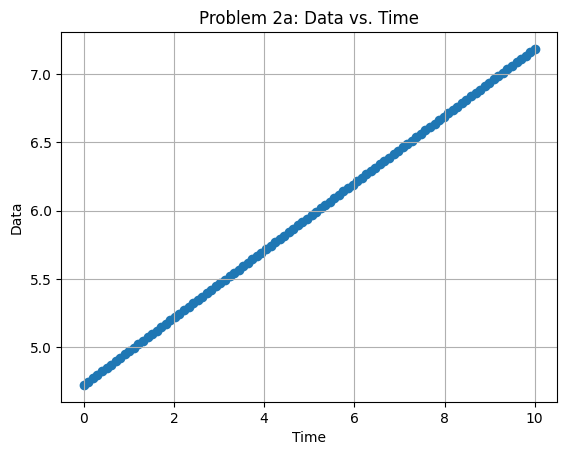

In [10]:
def problem2a(n, signal, noise):
    tot = np.zeros(n, dtype=float)
    for i in range(n):
        tot[i] = signal[i] + noise
    return tot

data = problem2a(N, np.random.randn()*t, np.random.randn()*s)
print(np.shape(data))
plt.scatter(t, data)
plt.title("Problem 2a: Data vs. Time")
plt.xlabel("Time")
plt.ylabel("Data")
plt.grid()
plt.show()

Trying to write my own slope function I kept getting different results than linregress, so I know I'm doing something wrong, but I don't know exactly what that is. So I just used the slopes of linregress for the last part of the problem as well.

0.24615975944228563 4.723071763032724 1.0 0.0 0.0
[0.95106018]
0.9510604195532


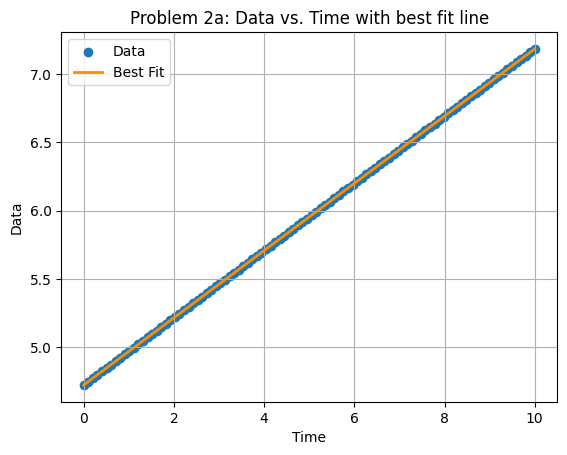

In [11]:
slope1, intercept, r_value, p_value, std_err = stats.linregress(t, data)
print(slope1, intercept, r_value, p_value, std_err)

slope = minimize(lambda x: np.sum((data - x*t)**2), 0.1,method="Nelder-mead", tol=1e-6)['x']
print(slope)

def best_fit(t,data):
    return np.sum(t*data)/np.sum(t**2)
best_fit = best_fit(t,data)
print(best_fit)

plt.scatter(t, data, label="Data")
plt.plot(t, slope1*t+intercept, label=f"Best Fit", color="darkorange", linewidth=2)
plt.title("Problem 2a: Data vs. Time with best fit line")
plt.xlabel("Time")
plt.ylabel("Data")
plt.grid()
plt.legend()
plt.show()

In [12]:
n=1000
tot_data = []

for i in range(0, n):
    tot_data.append(problem2a(N, np.random.randn()*t, np.random.randn()*s))

print(np.shape(tot_data))
slopes = np.zeros(len(tot_data), dtype=float)
for i in range(len(tot_data)):
    result = stats.linregress(t, tot_data[i])
    slopes[i] = result.slope
print(slopes)

(1000, 100)
[ 7.66462045e-01 -4.92038988e-01  6.25328895e-01  8.88204693e-01
  3.35965676e-01 -1.32679775e+00 -1.43562100e+00 -1.92417556e+00
 -8.18356082e-01 -8.69226434e-01 -1.64270298e+00  3.39437400e-01
 -9.11854520e-02  4.98170336e-01 -2.66107130e-01  1.96559460e-01
  6.24586079e-01 -7.84076591e-01  3.93322136e-01 -3.03952930e-01
 -1.00801396e-01 -1.01572241e+00 -2.38842088e+00  1.51652968e+00
 -1.52629937e+00  1.85519479e-01 -1.80706838e+00  1.22876341e+00
  1.27981704e+00 -2.39630285e-01 -2.65794076e-01 -1.68511490e+00
  2.07044097e-01 -2.33643654e+00  1.28923284e+00 -4.84703422e-01
 -1.05589482e+00  2.46309649e-01  1.70470948e-01  2.67559655e-01
 -1.13594700e+00  8.32803799e-02 -3.30288087e-01 -8.74866155e-01
  1.56916154e-01 -1.66000826e+00 -2.72649252e+00 -1.02621268e+00
  1.31230450e+00 -3.51035731e-01  1.05147630e+00 -2.85056815e+00
 -8.52724280e-01 -7.02435774e-01 -1.46996484e+00  2.04877187e+00
 -6.45493839e-01  5.52638305e-01 -1.78238686e+00  6.76572333e-02
 -1.50821789e

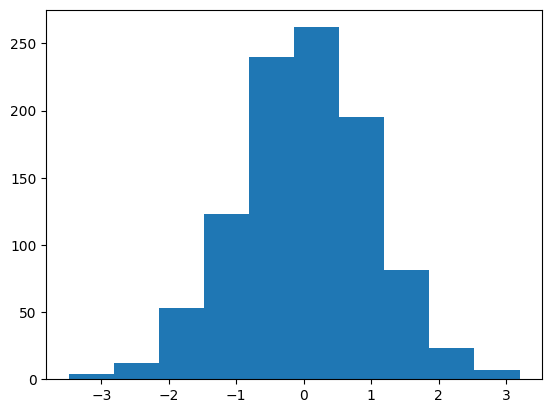

In [13]:
plt.hist(slopes)
plt.show()